### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión lineal multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
dataframe = pd.read_csv("data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
X = dataframe.iloc[:,1:].values
y = dataframe['duracion'].values.reshape(-1,1)

In [6]:
model = linear_model.LinearRegression()

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

## Score

In [13]:
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
model.score(X_test, y_test)

0.11920688069246033


-0.0864233459415753

Para que un score sea negativo la suma del cuadrado de los residuos debe ser mayor a la varianza de los valores reales del target. Para ello, el modelo predictivo debe aportar resultados totalmente desajustados de los datos reales, lo que implica que es inservible. Esto ocurre cuando se predicen los valores para el conjunto de test. Aún para el conjunto de train el coefciente de determinación es próximo a 0, indicando que este modelo no es nada bueno. 

In [17]:
print('intercept -->',model.intercept_)
print('coefficient', model.coef_)

intercept --> [9.44805467]
coefficient [[44.64751348  2.7678551  -0.72451441 29.47734478]]


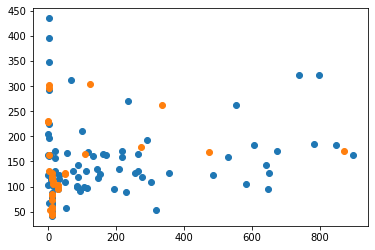

In [16]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_test_pred)

In [22]:
# Checking cross validation results
name = 'Linear Regression'
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[ 0.06062081 -1.25446072 -1.28936188  0.08082674  0.08786958  0.27699828
 -0.09286474 -0.61265829 -0.05620698 -0.69839119]
Linear Regression: -0.349763 (0.546107)


## RMSE

In [23]:
import sklearn.metrics as metrics

In [29]:
print('min "y" -->', min(y_test), '\t||\t', 'max "y" -->', max(y_test))
RMSE = metrics.mean_squared_error(y_test, y_test_pred, squared=False)
print('RMSE = ', RMSE)

min "y" --> [1.064] 	||	 max "y" --> [872.]
RMSE =  179.81760431185938


In [34]:
RMSE/(max(y_test)[0] - min(y_test)[0]) * 100

20.646477388907954

(array([28.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  1.064 ,  88.1576, 175.2512, 262.3448, 349.4384, 436.532 ,
        523.6256, 610.7192, 697.8128, 784.9064, 872.    ]),
 <BarContainer object of 10 artists>)

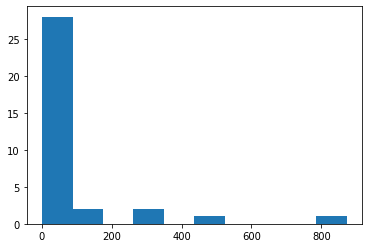

In [38]:
plt.hist(y_test)

El RMSE es alrededor de un 20% del rango de valores para la muestra de testeo. Esto eapunta a un valor alto de error, especialmente cuando la mayoría de los datos esta por debajo de 200 y el RMSE es de 180 aproximadamente, lo que muestra unos errores exagerados.

In [37]:
# Comprobación del MAE

MAE = metrics.mean_absolute_error(y_test, y_test_pred)
print('MAE:', MAE)
MAE/(max(y_test)[0] - min(y_test)[0]) * 100

MAE: 129.96688413796545


14.922667582688675

## Matriz de Correlación

<AxesSubplot:>

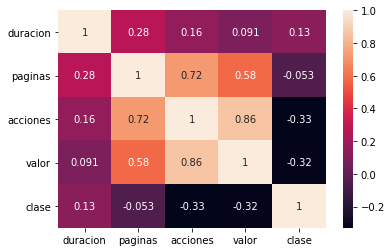

In [40]:
sb.heatmap(dataframe.corr(), annot=True)

Viendo que las correlaciones de las variables con la duración es tan baja, parece razonable que un modelo no pueda predecir correctamente esta valor en función de las otras variables. 

## ¿Es este modelo un buen método para este dataset?

Al haber tantas variables categóricas en este dataset un modelo de regresión no parece el mejor modelo para predecir la duración.